In [1]:
import Data.data_provider as dp
from Experiments.core_exp import visualize_tsne
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

D_limits = {2:6, 5:3.865, 10:2.586, 20:1.863}
# D_limits = {10:2.586}
BHD_all = []

for DL in D_limits:
    print("---------------------------------")

    bhd_d = []
    
    log_array = np.logspace(0, 1, num=20, base=10) - 1
    normalized_log_array = (log_array / log_array[-1]) * D_limits[DL] # 2D 6 - 5D 3.865 - 10D 2.586 - 20D 1.863

    # normalized_line_array = np.linspace(0, D_limits[DL], 20)

    for overlap_delta in normalized_log_array:
        params = {
            # exp
            "seed": 0,

            #data
            "plot_data": True,
            "data_size": 1000,
            "n_features": DL,

            "class1_mean_min":0, 
            "class1_mean_max":1,

            "class1_cov_min":1, 
            "class1_cov_max":2,

            "overlap_delta": overlap_delta,
        }


        X, y, tp, od = dp.make_classification_gaussian_with_true_prob_overlap(params["data_size"], 
                                                                params["n_features"], 
                                                                class1_mean_min = params["class1_mean_min"], 
                                                                class1_mean_max = params["class1_mean_max"],
                                                                class1_cov_min = params["class1_cov_min"], 
                                                                class1_cov_max = params["class1_cov_max"],
                                                                delta = params["overlap_delta"],
                                                                seed = params["seed"] 
                                                                )
        print("od", od)
        
        acc_runs = []
        for seed in range(1):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=seed)

            model = RandomForestClassifier(n_estimators=10, random_state=seed)
            model.fit(X_train, y_train)
            acc_runs.append(model.score(X_test, y_test))

        bhd_d.append(np.array(acc_runs).mean())
    BHD_all.append(bhd_d)
        # visualize_tsne(X, y, ".", "test", return_image=True)


---------------------------------
od 0.0
od 0.001172291506948617
od 0.005312767396492956
od 0.013576515737959953
od 0.027479368712058708
od 0.0490025058479245
od 0.08072647655343554
od 0.12600280486903678
od 0.1891735903677138
od 0.27585238906663617
od 0.3932833170729078
od 0.5507999840630079
od 0.7604118096379876
od 1.0375528548946378
od 1.402037962521515
od 1.8792833126863915
od 2.50186419699267
od 3.311502816654114
od 4.361604406112631
od 5.720492476300437
---------------------------------
od 0.0
od 0.0011724172270303564
od 0.005313337153714074
od 0.013577971724511235
od 0.027482315682552085
od 0.0490077610246481
od 0.0807351339045897
od 0.12601631779038225
od 0.1891938779148834
od 0.275881972309964
od 0.3933254939636175
od 0.5508590535168145
od 0.7604933584970346
od 1.0376641251963947
od 1.4021883213070243
od 1.8794848527046204
od 2.5021325044652394
od 3.3118579522175113
od 4.36207215774198
od 5.72110595919052
---------------------------------
od 0.0
od 0.0011727106994217555
od 0.0

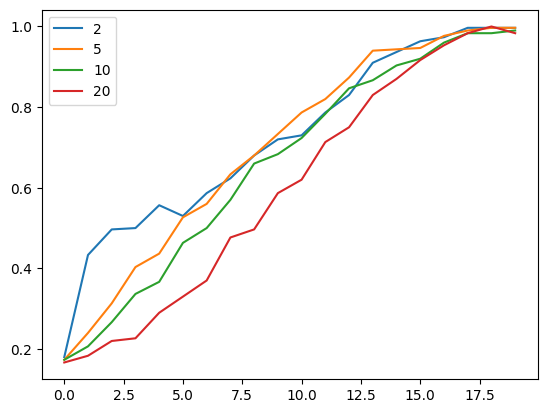

In [2]:
for bhd_d, DL in zip(BHD_all, D_limits):
    plt.plot(bhd_d, label=f"{DL}")
plt.legend()
plt.show()